In [1]:
import pandas as pd
import plotly.express as px
from IPython.display import Image
from benchmarks.cli.data_loader import DEFAULT_DB_PATH, TBL

In [2]:
db_path = f'../{DEFAULT_DB_PATH}'  # SQL db path to read epoch stats from
tbl = TBL                          # SQL table name to read epoch stats from
name = None                        # Save plot image to this stem (e.g. "m3", "azl")
host = None                        # Description of host the stats were collected on, used in plot subtitle (e.g. "M3 Mac", "Amazon Linux")

In [3]:
# Parameters
name = "data-loader-stats/azl"


In [4]:
db_uri = f'sqlite:///{db_path}'
df = pd.read_sql_table(tbl, db_uri)
df

,start,epoch,n_rows,elapsed,gc,alb_start,sha,user,hostname,uri,fmt,batch_size,soma_chunk_size,py_buffer_size,soma_buffer_size
0,2024-05-31 04:32:35.566117,0,132766,67.785076,1.393048,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824
1,2024-05-31 04:33:44.430892,1,132766,66.659818,1.396332,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824
2,2024-05-31 04:34:52.052397,2,132766,66.787510,1.420946,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824
3,2024-05-31 04:35:59.944589,3,132766,67.726625,1.453602,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824
4,2024-05-31 04:37:08.813815,4,132766,67.802696,1.454334,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2024-05-31 05:25:13.083334,0,132766,42.859662,1.960157,2024-05-31 05:25:13.053062,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,scipy.csr,1024,16384,1073741824,1073741824
71,2024-05-31 05:26:02.238305,1,132766,43.187904,1.932016,2024-05-31 05:25:13.053062,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,scipy.csr,1024,16384,1073741824,1073741824
72,2024-05-31 05:26:51.414987,2,132766,43.518613,2.062924,2024-05-31 05:25:13.053062,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,scipy.csr,1024,16384,1073741824,1073741824
73,2024-05-31 05:27:40.333196,3,132766,43.643135,2.040095,2024-05-31 05:25:13.053062,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,scipy.csr,1024,16384,1073741824,1073741824


In [5]:
(df.elapsed > 0).value_counts()

True    75
Name: elapsed, dtype: int64

In [6]:
df.n_rows.value_counts()

132766    75
Name: n_rows, dtype: int64

In [7]:
chunk_sizes = list(map(str, sorted(df['soma_chunk_size'].unique())))
x = 'SOMA chunk size'
y = 'Samples / sec'
df[x] = pd.Categorical(df['soma_chunk_size'].apply(str), categories=chunk_sizes)
df[y] = df.n_rows / df.elapsed
df

,start,epoch,n_rows,elapsed,gc,alb_start,sha,user,hostname,uri,fmt,batch_size,soma_chunk_size,py_buffer_size,soma_buffer_size,SOMA chunk size,Samples / sec
0,2024-05-31 04:32:35.566117,0,132766,67.785076,1.393048,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824,1024,1958.631730
1,2024-05-31 04:33:44.430892,1,132766,66.659818,1.396332,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824,1024,1991.694602
2,2024-05-31 04:34:52.052397,2,132766,66.787510,1.420946,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824,1024,1987.886660
3,2024-05-31 04:35:59.944589,3,132766,67.726625,1.453602,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824,1024,1960.322091
4,2024-05-31 04:37:08.813815,4,132766,67.802696,1.454334,2024-05-31 04:32:35.535851,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,np.array,1024,1024,1073741824,1073741824,1024,1958.122734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2024-05-31 05:25:13.083334,0,132766,42.859662,1.960157,2024-05-31 05:25:13.053062,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,scipy.csr,1024,16384,1073741824,1073741824,16384,3097.691247
71,2024-05-31 05:26:02.238305,1,132766,43.187904,1.932016,2024-05-31 05:25:13.053062,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,scipy.csr,1024,16384,1073741824,1073741824,16384,3074.147824
72,2024-05-31 05:26:51.414987,2,132766,43.518613,2.062924,2024-05-31 05:25:13.053062,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,scipy.csr,1024,16384,1073741824,1073741824,16384,3050.786594
73,2024-05-31 05:27:40.333196,3,132766,43.643135,2.040095,2024-05-31 05:25:13.053062,032e6385f1c1c018b6073559cf84c968e1fe4eb6,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,data/census-benchmark_2:7,scipy.csr,1024,16384,1073741824,1073741824,16384,3042.082134


In [8]:
[hostname] = df.hostname.unique()
hostname

'ip-172-31-0-157.us-west-2.compute.internal'

In [9]:
[batch_size] = df.batch_size.unique()
batch_size

1024

In [10]:
if host is None:
    if 'm3.lan' in hostname:
        host = 'M3 Mac'
    elif 'us-west-2' in hostname:
        host = 'Amazon Linux'
host_str = f"{host}, " if host else ""

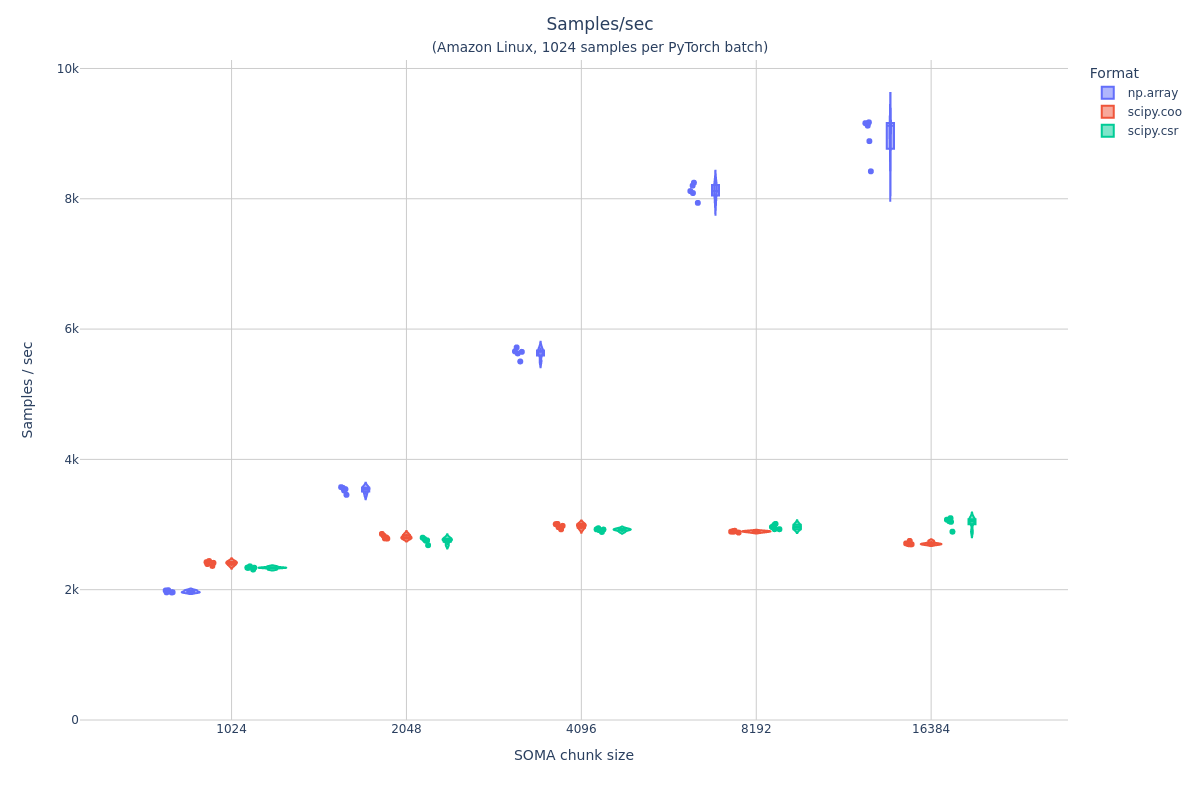

In [11]:
dims = dict(width=1200, height=800)
grid = '#ccc'
fig = px.violin(
    df, x=x, y=y,
    category_orders={ y: chunk_sizes, },
    color='fmt',
    box=True,
    points='all',
    labels={ 'fmt': "Format", }
).update_layout(
    plot_bgcolor='white',
    **dims,
    title=dict(
        text=f'Samples/sec<br><span style="font-size:0.8em">({host_str}{batch_size} samples per PyTorch batch)',
        x=0.5,
    )
).update_traces(
    hovertemplate=None,
).update_xaxes(
    gridcolor=grid,
).update_yaxes(
    gridcolor=grid,
    zeroline=True,
    zerolinecolor=grid,
    zerolinewidth=1,
    rangemode='tozero',
)
if name:
    fig.write_image(f'{name}.png', **dims)
    fig.write_json(f'{name}.json')
Image(fig.to_image(**dims))